# Hila Davies, GitHub Repository, Assessment 1

This dataset was collected to explore how working remotely affects stress levels, work-life balance, and mental health conditions across various industries and regions.

It culmunates 5,000 responses collected from employees worldwide. Accessed via Kaggle from user Waqar Ali. Created in 2024. 

**Columns:**
Employee_ID: Unique identifier for each employee.
Age: Age of the employee.
Gender: Gender of the employee.
Job_Role: Current role of the employee.
Industry: Industry they work in.
Work_Location: Whether they work remotely, hybrid, or onsite.
Stress_Level: Their self-reported level of stress.
Mental_Health_Condition: Any mental health condition reported (Anxiety, Depression, etc.).
Social_Isolation_Rating: A self-reported rating (1-5) on how isolated they feel.
Satisfaction_with_Remote_Work: How satisfied they are with remote work arrangements (Satisfied, Neutral, Unsatisfied).

In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
%matplotlib inline

df_url = 'https://raw.githubusercontent.com/hiladavies/workplace/refs/heads/main/Impact_of_Remote_Work_on_Mental_Health.csv'
url_content = requests.get(df_url, verify = False).content
work = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

work.shape

(5000, 20)

Let's look at some snippets of the data to check that it has imported properly.


In [46]:
# Shows first 5 rows
work.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,1,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,1,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,1,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,2,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,2,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [47]:
# Shows last 5 rows
work.tail()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
4995,EMP4996,32,Male,Sales,Consulting,4,Onsite,24,2,5,2,Burnout,Yes,Decrease,4,Neutral,1,Weekly,Average,Asia
4996,EMP4997,39,Female,Sales,Healthcare,27,Onsite,48,15,1,0,Depression,Yes,Decrease,1,Satisfied,1,NaN,Average,Africa
4997,EMP4998,42,Female,Sales,Healthcare,21,Hybrid,34,1,4,2,Burnout,No,Increase,3,Satisfied,1,Daily,Poor,Oceania
4998,EMP4999,27,Female,Sales,Healthcare,26,Remote,58,0,5,0,NaN,Yes,Increase,3,Unsatisfied,4,Daily,Average,Asia
4999,EMP5000,29,Male,HR,IT,30,Onsite,20,15,1,0,Depression,Yes,No Change,3,Unsatisfied,5,NaN,Poor,Asia


By doing this, we can see something weird with the data - years of experience do not seem accurate as for some participants, this is higher than their age. As such, we won't use this for analysis. 

In [5]:
# To be able to work with the data, it is important to get an accurate list of the column names and syntax
work.columns.values

array(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity',
       'Sleep_Quality', 'Region'], dtype=object)

We can start by getting a basic understanding of the main demographic points (gender, age) of the participants in the survey, to see if there are any other errors or abnormalities. 

In [6]:
# This counts how many responses there are for each gender category.
gender_counts = work['Gender'].value_counts()
print(gender_counts)

Gender
Female               1274
Male                 1270
Prefer not to say    1242
Non-binary           1214
Name: count, dtype: int64


This description shows that nearly a quarter of the data on gender is unkown ('Prefer not to say'), so it wouldn't be useful to use gender as a variable for any analysis as this is too much of the original data is incomplete.

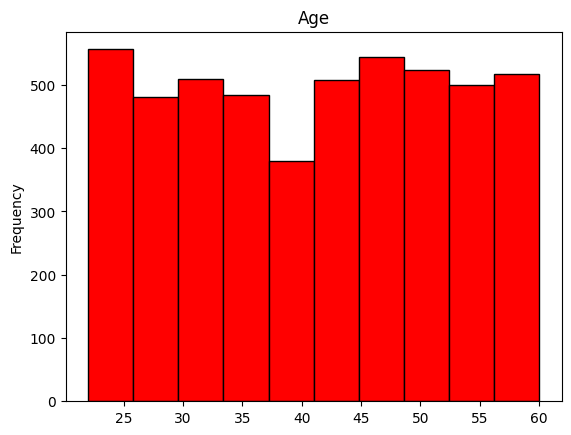

In [7]:
# Visualise the average age of participants
work['Age'].plot(kind = 'hist', color = 'red', edgecolor = 'black')
plt.title('Age')
plt.show();

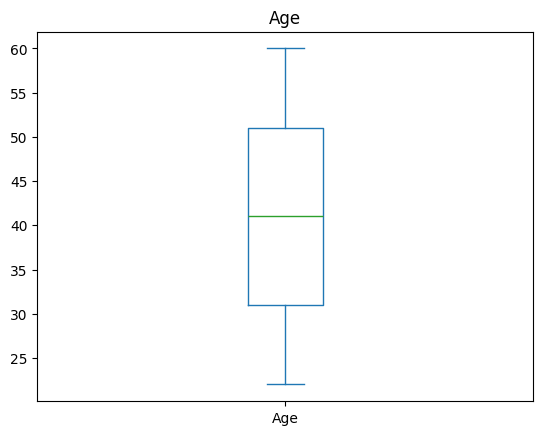

In [8]:
# Box plot
work['Age'].plot(kind = 'box', title = 'Age')
plt.show(); 

In [9]:
# Describe the age data further
work['Age'].describe()

count    5000.000000
mean       40.995000
std        11.296021
min        22.000000
25%        31.000000
50%        41.000000
75%        51.000000
max        60.000000
Name: Age, dtype: float64

From this we can see that the average age of participants is 41 years old, with a lower quartile age of 31 and a upper quartile age of 51. Therefore, the majority of respondents are between 31 and 51. However, the standard deviation from this mean is approx. 11 years, so there is high variation.

**Let's start by looking at Stress Levels for all participants.** We can then use this data to compare to different variables, such as age and work location.

In [10]:
work['Stress_Level'].describe()

count     5000
unique       3
top       High
freq      1686
Name: Stress_Level, dtype: object

In [11]:
work['Stress_Level'].head()

0    Medium
1    Medium
2    Medium
3      High
4      High
Name: Stress_Level, dtype: object

In [12]:
work['Stress_Level'].tail()

4995    High
4996     Low
4997    High
4998     Low
4999     Low
Name: Stress_Level, dtype: object

In [13]:
# Assign numerical values to each stress level indicator to be able to process the data better.
work['Stress_Level'] = work['Stress_Level'].map({'Low':0, 'Medium': 1, 'High': 2})

In [14]:
work['Stress_Level'].describe()

count    5000.000000
mean        1.008200
std         0.816251
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Stress_Level, dtype: float64

From this, we can see that the mean Stress_Level is just over 1. Therefore, the average response was 'Medium' Stress_Levels.

We can also see this visually using a Bar Chart:

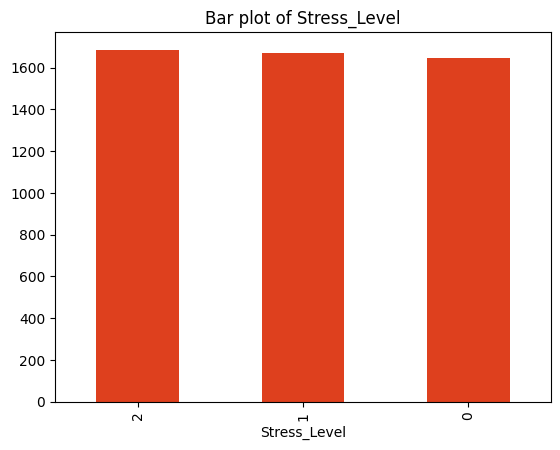

In [15]:
work['Stress_Level'].value_counts().plot(kind = 'bar', color = '#DE401E', title = 'Bar plot of Stress_Level')
plt.show();

It is important to do this visual exercise because it shows that there is minimal difference in the number of responses for each Stress_Level indicator. Therefore, it may not be statistically relevant or interesting to use this variable. 

To test this theory, let's see if there are any changes in variation when comparing stress levels to another variable (e.g. age).

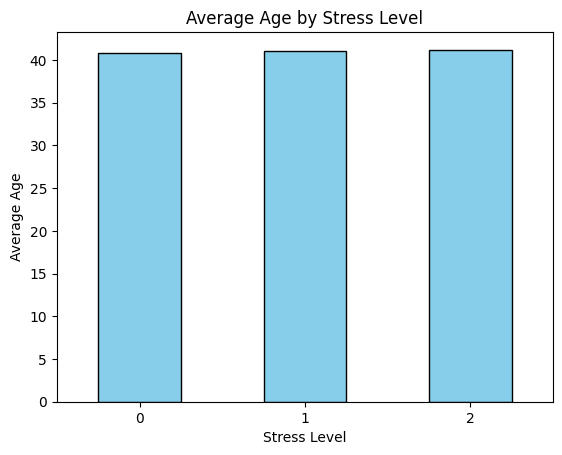

In [16]:
# Bar chart
age_stress = work.groupby('Stress_Level')['Age'].mean()

age_stress.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Age by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Age')
plt.xticks(rotation=0)
plt.show()

This visually shows us that there is no discernible difference between stress levels in comparison to age. Stress levels do not noticeably get higher or lower depending on age. 

Let's try another variable. This time, we will compare stress levels to number of virtual meetings.

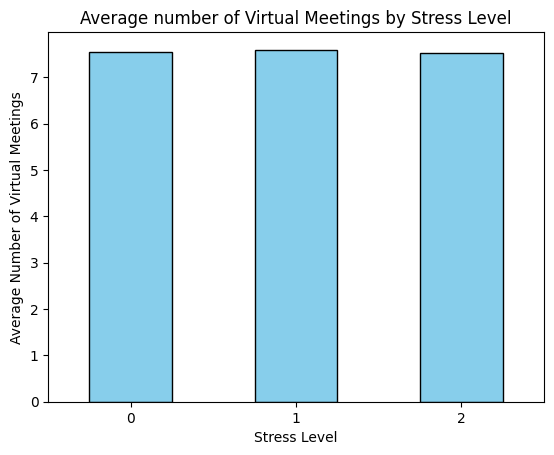

In [17]:
# Bar chart
virtual_stress = work.groupby('Stress_Level')['Number_of_Virtual_Meetings'].mean()

virtual_stress.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average number of Virtual Meetings by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Number of Virtual Meetings')
plt.xticks(rotation=0)
plt.show()

This shows us a similar result. How about, Hours Worked per Week?

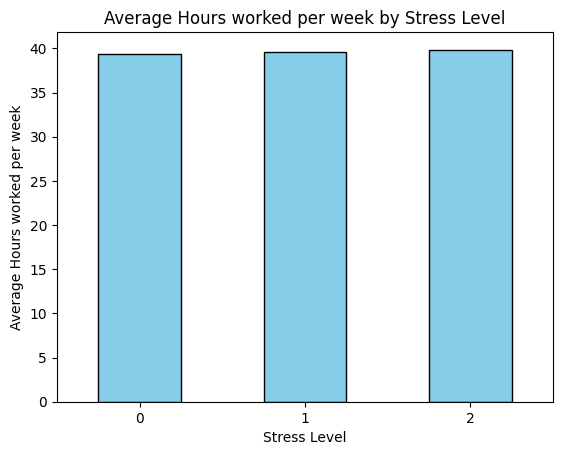

In [18]:
# Bar chart
hours_stress = work.groupby('Stress_Level')['Hours_Worked_Per_Week'].mean()

hours_stress.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Hours worked per week by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Hours worked per week')
plt.xticks(rotation=0)
plt.show()

And work location?

In [19]:
# Work Location variables
locations = work['Work_Location'].value_counts()

print(locations)

Work_Location
Remote    1714
Hybrid    1649
Onsite    1637
Name: count, dtype: int64


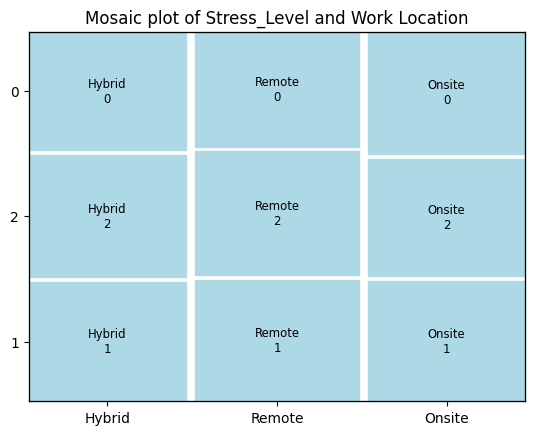

In [20]:
# A mosaic plot here will allow us to compare two sets of categorical data (Work Location and Stress Levels)

import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.mosaicplot import mosaic

location_colors = lambda key: {'color': 'lightcoral' if 'f' in key else 'lightblue'}
mosaic(work, ['Work_Location', 'Stress_Level'], title='Mosaic plot of Stress_Level and Work Location', 
       properties = location_colors, gap = 0.02)
plt.show();

We can visually observe that there is marginally higher stress levels amongst remote workers than hybrid or onsite. We can confirm this by finding the exact values.

In [29]:
remote_stress = work[work['Work_Location'] == 'Remote']['Stress_Level'].mean()
hybrid_stress = work[work['Work_Location'] == 'Hybrid']['Stress_Level'].mean()
onsite_stress = work[work['Work_Location'] == 'Onsite']['Stress_Level'].mean()

print(f"The mean Stress Level for Remote work location is: {remote_stress:.2f}")
print(f"The mean Stress Level for Hybrid work location is: {hybrid_stress:.2f}")
print(f"The mean Stress Level for Onsite work location is: {onsite_stress:.2f}")

The mean Stress Level for Remote work location is: 1.03
The mean Stress Level for Hybrid work location is: 1.01
The mean Stress Level for Onsite work location is: 0.99


Let's instead look at Hours Worked per Week and compare this to other variables.

In [11]:
# Describe the data
work['Hours_Worked_Per_Week'].describe()

count    5000.000000
mean       39.614600
std        11.860194
min        20.000000
25%        29.000000
50%        40.000000
75%        50.000000
max        60.000000
Name: Hours_Worked_Per_Week, dtype: float64

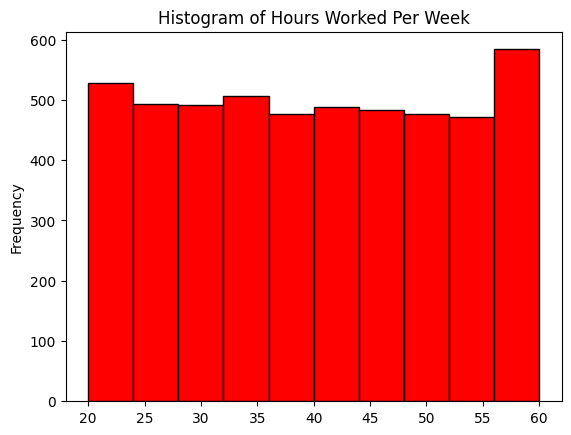

In [30]:
# Create a histogram
work['Hours_Worked_Per_Week'].plot(kind = 'hist', color = 'red', edgecolor = 'black')
plt.title('Histogram of Hours Worked Per Week')
plt.show();

While the mean shows that the average number of hours worked per week is 39.6, using a visual tool like a histogram reveals that between 56-60 hours per week is the most frequent response from the data. 

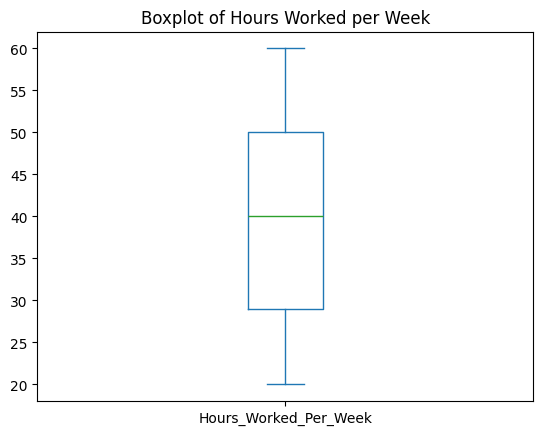

In [13]:
# Box plot
work['Hours_Worked_Per_Week'].plot(kind = 'box', title = 'Boxplot of Hours Worked per Week')
plt.show(); 

These two data visualisations show that there is high diversity in the number of hours worked per week, between 20 and 60. Additionally, the interquartile range is 21 hours. 

Let's compare Hours Worked per Week to second variable:

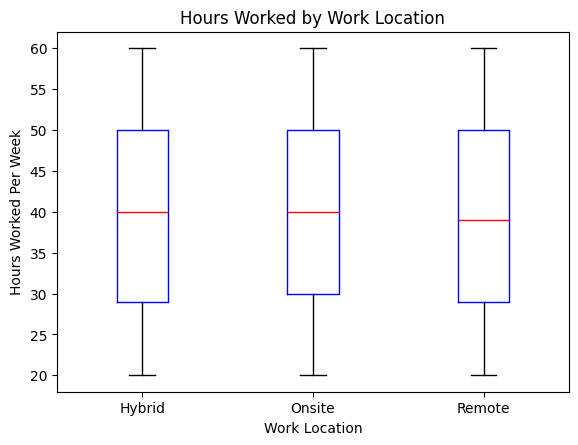

In [74]:
# Box plot for Hours Worked by Work Location
work.boxplot(column='Hours_Worked_Per_Week', by='Work_Location', grid=False, color=dict(boxes='blue', whiskers='black', medians='red', caps='black'))

plt.title('Hours Worked by Work Location')
plt.suptitle('') 
plt.xlabel('Work Location')
plt.ylabel('Hours Worked Per Week')
plt.show()


Visually, we can see that remote workers on average work less hours a week. Let's break down this finding a bit more:

In [79]:
remote_hours = work[work['Work_Location'] == 'Remote']['Hours_Worked_Per_Week'].mean()
onsite_hours = work[work['Work_Location'] == 'Onsite']['Hours_Worked_Per_Week'].mean()
hybrid_hours = work[work['Work_Location'] == 'Hybrid']['Hours_Worked_Per_Week'].mean()

print(remote_hours)
print(onsite_hours)
print(hybrid_hours)

39.445740956826135
39.820403176542456
39.58580958156458


As we saw earlier, remote workers had higher stress levels than any other work location. Let's see if this corresponds to high numbers of hours worked too. 

In [40]:
#
work_stress_hours = work.groupby(['Work_Location', 'Stress_Level'])['Hours_Worked_Per_Week'].mean().unstack()

print(work_stress_hours)

Stress_Level           0          1          2
Work_Location                                 
Hybrid         39.392265  39.398165  39.955437
Onsite         39.401802  40.029250  40.041121
Remote         39.334552  39.396880  39.596610


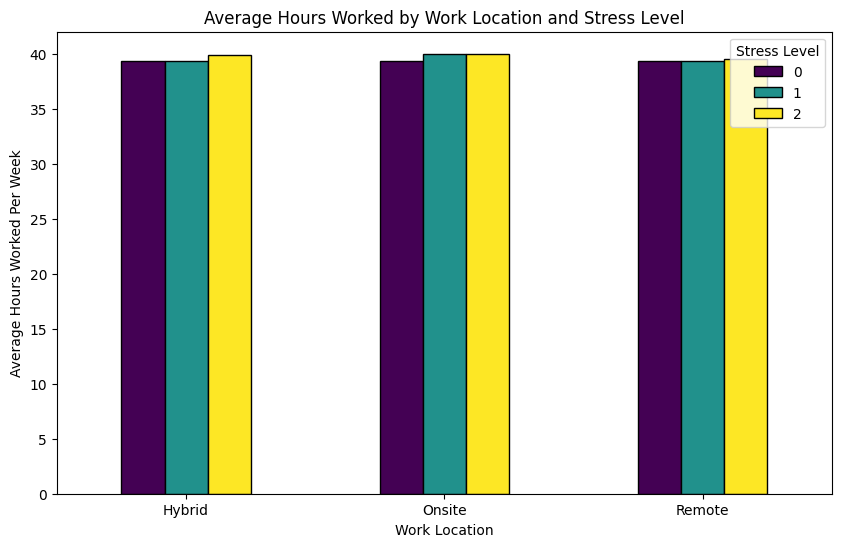

In [41]:
# Plot grouped data as a bar chart
work_stress_hours.plot(kind='bar', figsize=(10, 6), edgecolor='black', colormap='viridis')

plt.title('Average Hours Worked by Work Location and Stress Level')
plt.xlabel('Work Location')
plt.ylabel('Average Hours Worked Per Week')
plt.legend(title='Stress Level')
plt.xticks(rotation=0)
plt.show()


This is interesting as it shows that while Remote workers have higher stress levels on average, it does not correspond to the number of hours worked per week. Instead, this visualisation shows that there is more variance in stress level based on average hours worked in Hybrid and Onsite work, than in Remote work, suggesting, while minimally, that number of hours worked has a greater effect on stress levels amongst Hybrid and Onsite workers than Remote workers.